### Import Necessary Module and Set Path 

In [1]:
import sqlite3 as lite
import os
import sys
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [2]:
import write_deployinst_input as wr
import analysis as an

## Run Cyclus Input file

In [ ]:
! rm cyclus.sqlite
! cyclus eg01-eg23-deploy1.xml

### The output file should be named 
         
          cyclus.sqlite

In [ ]:
# Wait for the complete message to move on

con = lite.connect('cyclus.sqlite')
with con:
    cur = con.cursor()
    
    # get simulation time info
    init_year, init_month, duration, timestep = an.get_sim_time_duration(cur)
    
    # prints net capacity and number of reactor timeseries
    an.plot_power(cur)
    """
    # get tailings mass timeseries
    tailings = an.commodity_in_out_facility(cur, 'enrichment',
                                            ['tailings'], True, False, False)
    an.stacked_bar_chart(tailings, timestep,
                      'Year', 'Mass [MTHM]',
                      'Tailings vs Time',
                      'tailings', init_year)
    
    # get fuel mass timeseries
    fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])
    an.stacked_bar_chart(fuel_dict, timestep,
                      'Years', 'Mass[MTHM]',
                      'Total Fuel Mass vs Time',
                      'total_fuel',
                      init_year)
    
    # uranium utilization
    dictionary = {}
    dictionary['uranium_utilization'] = an.u_util_calc(cur)
    an.stacked_bar_chart(dictionary, timestep,
                         'Years', 'U Utilization Factor',
                         'U Utilization vs Time',
                         'u_util', init_year)
    
    # get plutonium flow
    combined = an.commodity_in_out_facility(cur, 'separations', ['mox_Pu', 'uox_Pu'], True, False, True)
    uox_Pu = an.commodity_in_out_facility(cur, 'separations', ['uox_Pu'], True, False, True)
    mox_Pu = an.commodity_in_out_facility(cur, 'separations', ['mox_Pu'], True, False, True)
    an.stacked_bar_chart(combined, timestep, 'Years', 'Mass[MTHM]',
                      'Total reprocessed Pu outflux vs Time', 'combined',
                      init_year)
    an.stacked_bar_chart(uox_Pu, timestep, 'Years', 'Mass[MTHM]',
                      'reprocessed Pu from spent UOX vs Time', 'uox_Pu',
                      init_year)
    an.stacked_bar_chart(mox_Pu, timestep, 'Years', 'Mass[MTHM]',
                      'reprocessed Pu from spent MOX vs Time', 'mox_Pu',
                      init_year)
    """
    

print('Finished!')

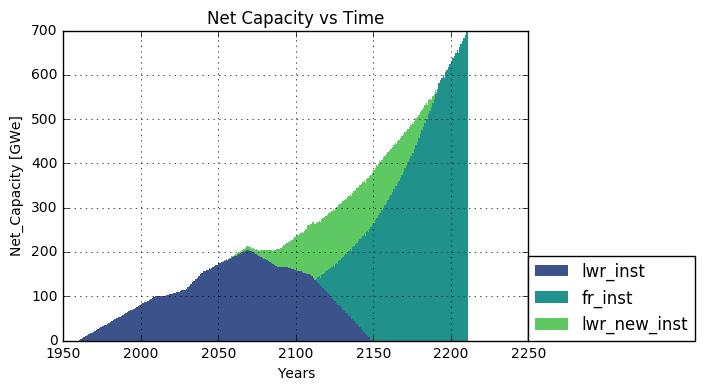

In [16]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

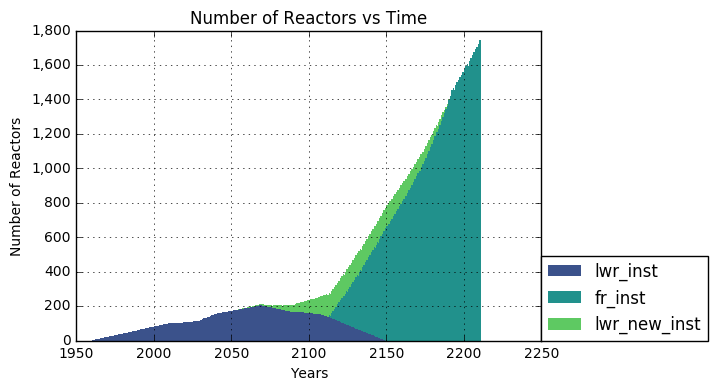

In [17]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='number_plot.png')

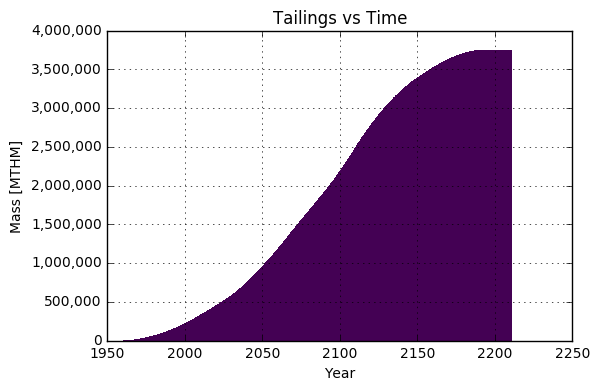

In [18]:
# Display Tailings vs Time
from IPython.display import Image
Image(filename='tailings.png')

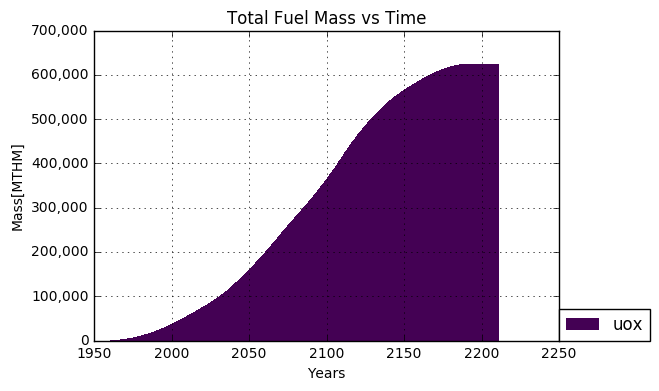

In [19]:
# Display Total Fuel vs Time
from IPython.display import Image
Image(filename='total_fuel.png')

In [ ]:
# Display Uranium Utilization vs Time
from IPython.display import Image
Image(filename='u_util.png')

In [ ]:
# Display Separated Pu Flow
from IPython.display import Image
Image(filename='combined.png')

from IPython.display import Image
Image(filename='mox_Pu.png')

from IPython.display import Image
Image(filename='uox_Pu.png')